# Momenton Data Challenge

### Problem Statement: 
You have been engaged to provide insights for a movie production company. They want to understand the most popular movie genres, year by year, for the past decade by using user rating from tweets.

## Movie Tweetings Data Exploration

### Libraries

In [1]:
##Loading all the required libraries
%matplotlib inline
import pandas as pd
import numpy as np
#import random
#import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999

<IPython.core.display.Javascript object>

### Data

Movie Tweetings dataset provided: https://github.com/momenton/MovieTweetings/tree/master/snapshots/100K

In [3]:
# Reading the rating data file and storing it into dataframes
rating_file = 'F:/Projects/Movie_Reccomender_Systems/momenton-code-test-movietweetings-master/snapshots/100K/ratings.dat'

# data format in rating file: UserID::MovieID::Rating::Timestamp
df_rating = pd.read_csv(rating_file, sep='::', header=None, names=['user_id', 'movie_id', 'rating', 'timestamp'])
df_rating.head(2)

,user_id,movie_id,rating,timestamp
0,1,1074638,7,1365029107
1,1,1853728,8,1366576639


In [4]:
# Reading the movie data file and storing it into dataframes
movies_file = 'F:/Projects/Movie_Reccomender_Systems/momenton-code-test-movietweetings-master/snapshots/100K/movies.dat'

# data format in movie file: MovieID::Title(movie_year)::Genres
df_movie = pd.read_csv(movies_file, sep='::', header=None, names=['movie_id', 'title', 'genre'])
df_movie.head(2)

,movie_id,title,genre
0,2844,FantÃ´mas - Ã€ l'ombre de la guillotine (1913),Crime|Drama
1,4936,The Bank (1915),Comedy|Short


In [5]:
# Reading the user data file and storing it into dataframes
users_file = 'F:/Projects/Movie_Reccomender_Systems/momenton-code-test-movietweetings-master/snapshots/100K/users.dat'

# data format in user file: UserID::MovieID
df_users = pd.read_csv(users_file, sep='::', header=None, names=['user_id','movie_id'])
df_users.head(2)

,user_id,movie_id
0,1,18405182
1,2,31260677


### Rating Data Exploration

First we'll explore the rating data and laverage findings to get the insights from it. Let's have a look at few entries from rating data.

In [6]:
df_rating.head(2)

,user_id,movie_id,rating,timestamp
0,1,1074638,7,1365029107
1,1,1853728,8,1366576639


Let's have a look at the statistical summary in rating data

In [7]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
user_id      100000 non-null int64
movie_id     100000 non-null int64
rating       100000 non-null int64
timestamp    100000 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB


In [8]:
# Checking the missing values in the rating data
df_rating.isna().sum()

user_id      0
movie_id     0
rating       0
timestamp    0
dtype: int64

There are no missing values in the data and from statistical summary we can see, there is 1M records of user ratings with 4 key attributes: user id, movie id, rating and timestamp. The timestamp column is integer so We will convert it to datetinme type and extract year and month for further analysis and sort the records by timestamp.

In [9]:
# trasform timestamp atrribute from integer to datetime and exract year and month
df_rating['timestamp'] = df_rating['timestamp'].apply(datetime.fromtimestamp)
df_rating['year'] = df_rating['timestamp'].dt.year
df_rating['month'] = df_rating['timestamp'].dt.month
df_rating['date'] = df_rating['timestamp'].dt.date
df_rating = df_rating.sort_values('timestamp').reset_index(drop=True)

In [10]:
df_rating.head(2)

,user_id,movie_id,rating,timestamp,year,month,date
0,12620,2171847,6,2013-03-01 01:38:27,2013,3,2013-03-01
1,7527,444778,8,2013-03-01 01:43:44,2013,3,2013-03-01


In [11]:
print('Years:', df_rating.year.unique())
print('Months', df_rating.month.unique())
print('#Unique users:', df_rating.user_id.nunique())
print('#Unique movies:', df_rating.movie_id.nunique())
print('Unique ratings:', df_rating.rating.unique())
print('Average rating:', round(df_rating.rating.mean(), 2))
print('Frequency of each rating value:')
print(df_rating['rating'].value_counts())

Years: [2013]
Months [3 4 5 6 7 8 9]
#Unique users: 16554
#Unique movies: 10506
Unique ratings: [ 6  8  7  5  4  9  2 10  3  1  0]
Average rating: 7.32
Frequency of each rating value:
8     24145
7     22229
9     14005
6     12944
10    12392
5      6726
4      3367
3      1844
1      1212
2      1124
0        12
Name: rating, dtype: int64


We can see that user rating data is for the period of March to September 2013.  
There are 16554 unique users who have rated 3706 movies in total.  
The rating values are ranging from 0 to 10 with average rating around 7.32 and most frequent rating value is 8.

Also, There is only one year of user ratings data available so let's explore the user rating per month. 

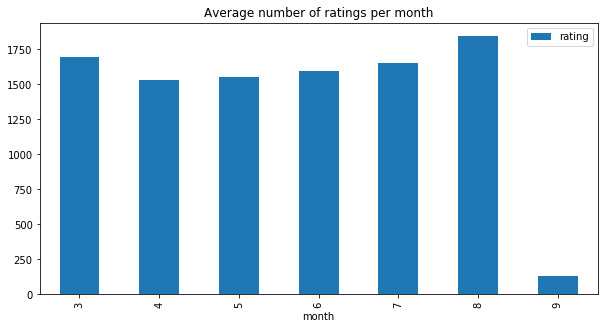

In [12]:
df_temp = df_rating[['month', 'rating']].groupby(['month']).count().reset_index()
df_temp['rating'] = df_temp['rating'] / 10
df_temp.plot.bar(x='month', y='rating', title='Average number of ratings per month', figsize=(10, 5));

For the year 2013, the average user rating for the month of Sepetmeber is very less as compared to the rest of the months in the rating data. This shows that only 7.4% users have rated movies for September month.

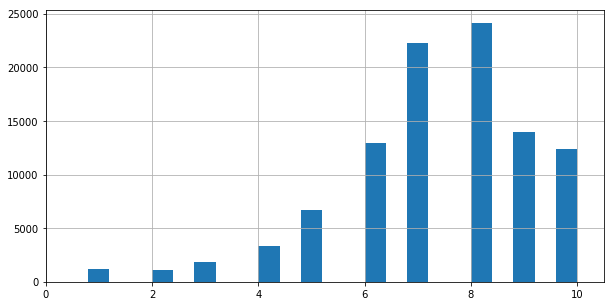

In [13]:
df_rating['rating'].hist(figsize=(10, 5), linewidth = 1.5, bins=25);
plt.xlim(xmin=0)
plt.show()

From this histogram plot we can see that the most common rating value is 8 followed by 7. ratings 6, 9 and 10 are approximately equal about 45%. We can also conclude that most of people giverating 10. Since, the rating data is only available for about 7 months in 2013 year. So, this data is not accurate 100%.

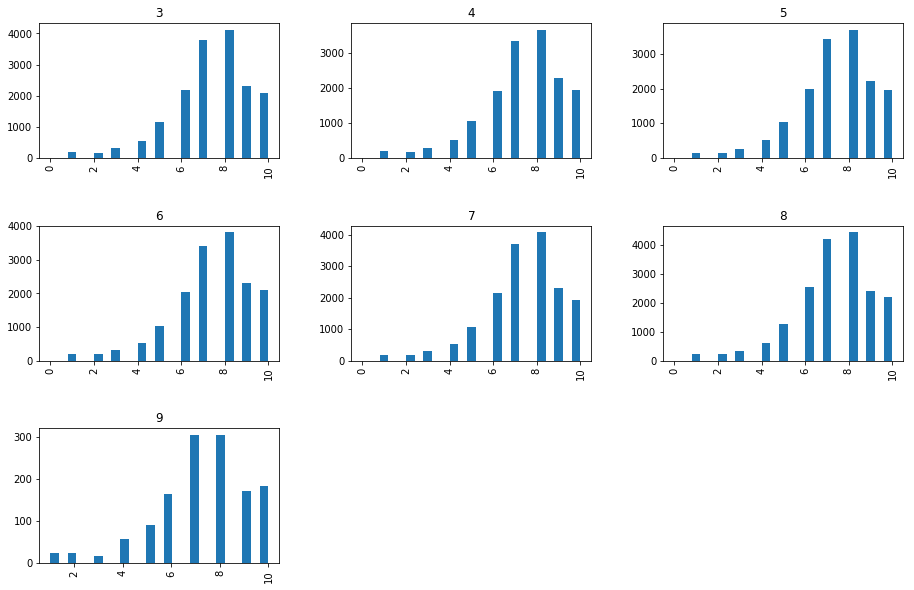

In [14]:
df_rating['rating'].hist(by=df_rating['month'], figsize=(15, 10), bins=25);

We can see similar distribution for all the months given the data

In [15]:
df_rating['user_id'].value_counts().nlargest(n=10)

2850     320
16036    308
4396     285
8822     274
15289    240
10728    212
4776     201
15651    198
7180     190
13067    185
Name: user_id, dtype: int64

We can see that user with id 2850 is the top users with 320 ratings. We can see the distribution of number of reviews per user using box plot and histogram.

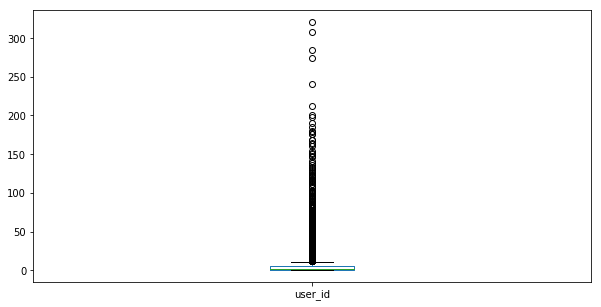

In [16]:
df_rating['user_id'].value_counts().plot.box(figsize=(10, 5));

We can see that median is around 10. We can users with number of reviews more than extreme value(approximately 30).

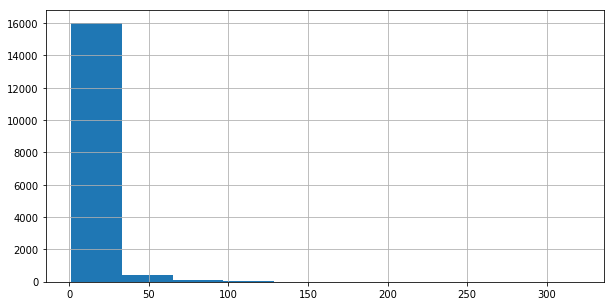

In [17]:
df_rating['user_id'].value_counts().hist(figsize=(10, 5));

From the histogram we can observe that most of the people(around 16000) are having number of reviews in the range of 1 to 30. Around 500 people are having 30-60 reviews. 50(approximate) people are having more than 70 reviews.

## Movie Data Exploration

Let's have a look at few records in the data

In [18]:
df_movie.head()

,movie_id,title,genre
0,2844,FantÃ´mas - Ã€ l'ombre de la guillotine (1913),Crime|Drama
1,4936,The Bank (1915),Comedy|Short
2,4972,The Birth of a Nation (1915),Drama|History|Romance|War
3,5078,The Cheat (1915),Drama
4,6684,The Fireman (1916),Short|Comedy


We can see movie release year is appended to tile of the movie, so we'll split the year and store it in release_year dataframe

In [19]:
df_movie['release_year'] = df_movie.title.str.extract("\((\d{4})\)", expand=True).astype(str)
df_movie['release_year'] = pd.to_datetime(df_movie.release_year, format='%Y')
df_movie['release_year'] = df_movie.release_year.dt.year
df_movie['title'] = df_movie.title.str[:-7]

In [20]:
# Statistical summary of movie data
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 4 columns):
movie_id        10506 non-null int64
title           10506 non-null object
genre           10440 non-null object
release_year    10506 non-null int64
dtypes: int64(2), object(2)
memory usage: 328.4+ KB


In [21]:
# Checking the missing values in the rating data
df_movie.isna().sum()

movie_id         0
title            0
genre           66
release_year     0
dtype: int64

As we can see there are 66 missing values in genre. Replacing missing values with most common genre for each release_year will skew the data towards most common genre for that release_year which doesn't make any sense. So, We'll drop the na values from genre.

In [22]:
#Droping the missing(NA) values
df_movie = df_movie.dropna(axis=0, how='any')

In [23]:
df_movie.isna().sum()

movie_id        0
title           0
genre           0
release_year    0
dtype: int64

In [24]:
# Printing unique genres
genres_unique = pd.DataFrame(df_movie.genre.str.split('|').tolist()).stack().unique()
print('Unique genres', genres_unique)

Unique genres ['Crime' 'Drama' 'Comedy' 'Short' 'History' 'Romance' 'War' 'Biography'
 'Sport' 'Horror' 'Action' 'Adventure' 'Family' 'Fantasy' 'Mystery'
 'Thriller' 'Documentary' 'Western' 'Sci-Fi' 'Musical' 'Film-Noir'
 'Animation' 'Music' 'Adult' 'News']


In [25]:
genres_unique = pd.DataFrame(genres_unique, columns=['genre'])
genres_unique

,genre
0,Crime
1,Drama
2,Comedy
3,Short
4,History
5,Romance
6,War
7,Biography
8,Sport
9,Horror


Creating dummy column for each column with boolean values

In [26]:
df_movie = df_movie.join(df_movie.genre.str.get_dummies().astype(bool))

In [27]:
df_movie.drop('genre', inplace=True, axis=1)

In [28]:
df_movie.head()

,movie_id,title,release_year,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,...,Musical,Mystery,News,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,2844,FantÃ´mas - Ã€ l'ombre de la guillotine,1913,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,4936,The Bank,1915,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
2,4972,The Birth of a Nation,1915,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
3,5078,The Cheat,1915,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,6684,The Fireman,1916,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False


In [29]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10440 entries, 0 to 10505
Data columns (total 28 columns):
movie_id        10440 non-null int64
title           10440 non-null object
release_year    10440 non-null int64
Action          10440 non-null bool
Adult           10440 non-null bool
Adventure       10440 non-null bool
Animation       10440 non-null bool
Biography       10440 non-null bool
Comedy          10440 non-null bool
Crime           10440 non-null bool
Documentary     10440 non-null bool
Drama           10440 non-null bool
Family          10440 non-null bool
Fantasy         10440 non-null bool
Film-Noir       10440 non-null bool
History         10440 non-null bool
Horror          10440 non-null bool
Music           10440 non-null bool
Musical         10440 non-null bool
Mystery         10440 non-null bool
News            10440 non-null bool
Romance         10440 non-null bool
Sci-Fi          10440 non-null bool
Short           10440 non-null bool
Sport           10440 n

In [30]:
# Merging the rating and movie data to get desired attributes in single dataframe for better analysis
movie_data = pd.merge(df_rating, df_movie, on='movie_id')

In [31]:
movie_data.head()

,user_id,movie_id,rating,timestamp,year,month,date,title,release_year,Action,...,Musical,Mystery,News,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,12620,2171847,6,2013-03-01 01:38:27,2013,3,2013-03-01,Dead Mine,2012,True,...,False,False,False,False,False,False,False,False,False,False
1,3892,2171847,6,2013-05-16 23:19:38,2013,5,2013-05-16,Dead Mine,2012,True,...,False,False,False,False,False,False,False,False,False,False
2,10908,2171847,5,2013-05-25 16:44:19,2013,5,2013-05-25,Dead Mine,2012,True,...,False,False,False,False,False,False,False,False,False,False
3,314,2171847,3,2013-05-31 23:46:33,2013,5,2013-05-31,Dead Mine,2012,True,...,False,False,False,False,False,False,False,False,False,False
4,7250,2171847,3,2013-06-27 19:24:46,2013,6,2013-06-27,Dead Mine,2012,True,...,False,False,False,False,False,False,False,False,False,False


In [32]:
# Calculate the average ratings for each release year
ratings_mean_count = pd.DataFrame(movie_data.groupby('release_year')['rating'].mean())

In [33]:
# Calculate the total number of ratings for each release year
ratings_mean_count['rating_count'] = pd.DataFrame(movie_data.groupby('release_year')['rating'].count())

In [34]:
# Store mean count and total number of ratings count in ratings_mean_count for further analysis 
ratings_mean_count.sort_values( by='release_year', ascending=False).reset_index().head(11)

,release_year,rating,rating_count
0,2013,7.159749,32720
1,2012,7.115258,22480
2,2011,7.092317,6976
3,2010,7.237633,4326
4,2009,7.309385,3090
5,2008,7.430493,2453
6,2007,7.414024,2239
7,2006,7.563572,1982
8,2005,7.355049,1535
9,2004,7.560631,1839


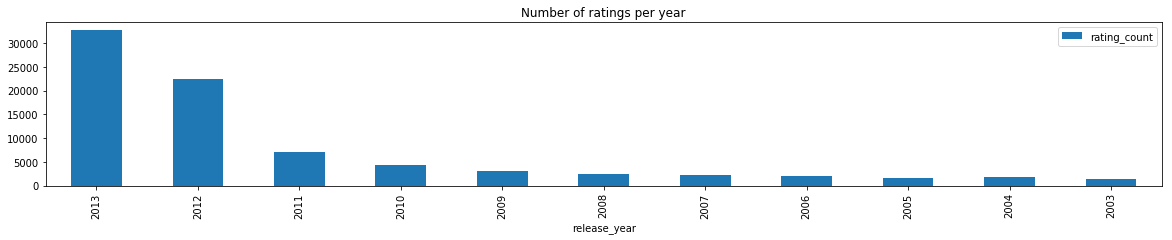

In [35]:
#Plotting number of ratings for each year for the past decade (2003-2013)
ratings_mean_count.reset_index().sort_values( by='release_year', ascending=False).head(11).plot.bar(x='release_year', y='rating_count', title='Number of ratings per year', figsize=(20, 3))

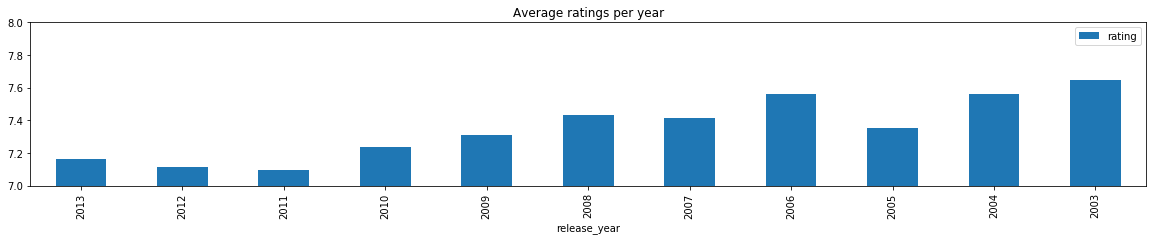

In [36]:
#Plotting average ratings for each year for the past decade (2003-2013)
ratings_mean_count.reset_index().sort_values( by='release_year', ascending=False).head(11).plot.bar(x='release_year', y='rating', title='Average ratings per year', ylim=(7, 8), figsize=(20, 3));

Text(0.5, 0, 'Genre')

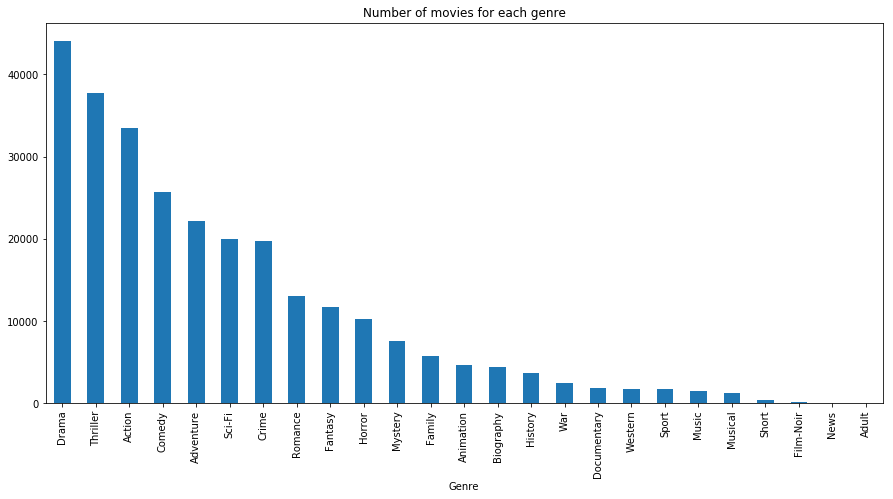

In [37]:
# Calculating total number of mvies count for each genre in movie data
df_temp = pd.DataFrame(columns=['genre', 'num_movies'])
for genre in genres_unique.genre:
    row = [genre, movie_data[movie_data[genre]==True][['movie_id']].count()]
    df_temp.loc[len(df_temp)] = row
df_temp['num_movies'] = df_temp['num_movies'].astype(np.int32)
df_temp = df_temp.sort_values('num_movies', ascending=False).set_index('genre')
plot_fig = df_temp['num_movies'].plot(kind='bar', figsize=(15,7))
plot_fig.set_title('Number of movies for each genre')
plot_fig.set_xlabel('Genre')

We can see that Drama and Thriller are having very high number of movies followed by Action, Comedy, Adventure, Sci-Fi, Crime relatively. Romance, Fantasy and horror have average number of movies. We can also have a look at how the trend(based on number of rating) of each genre changes over time.

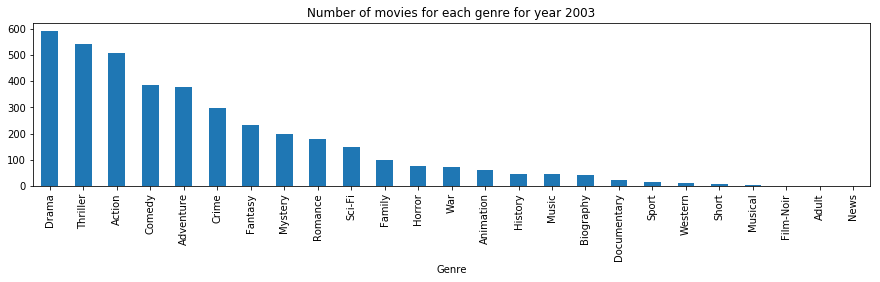

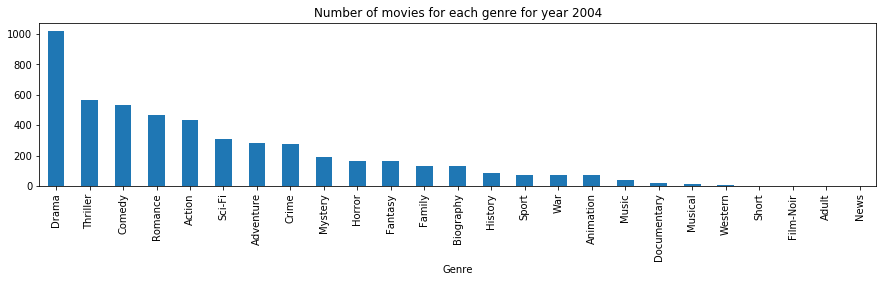

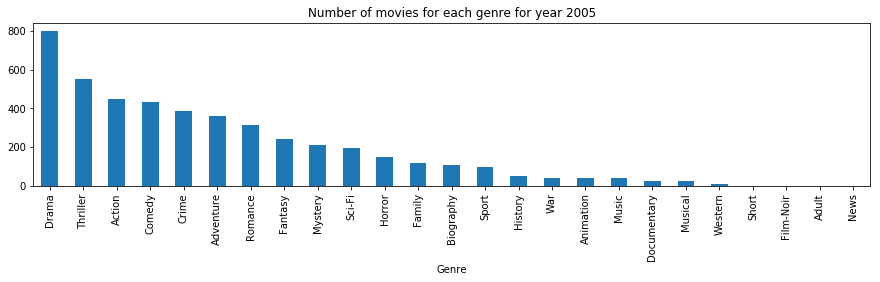

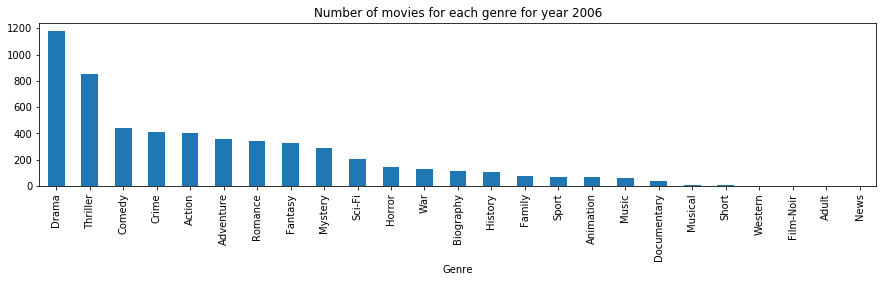

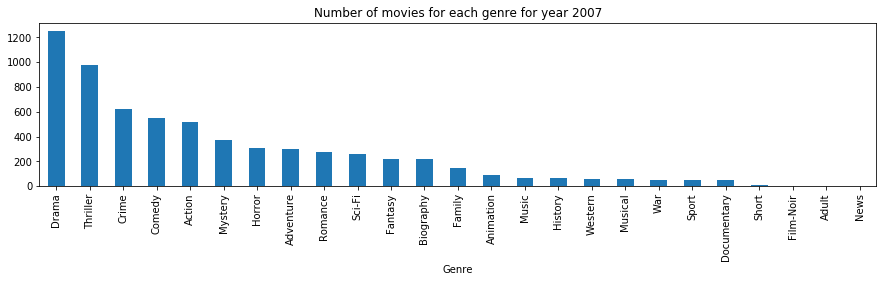

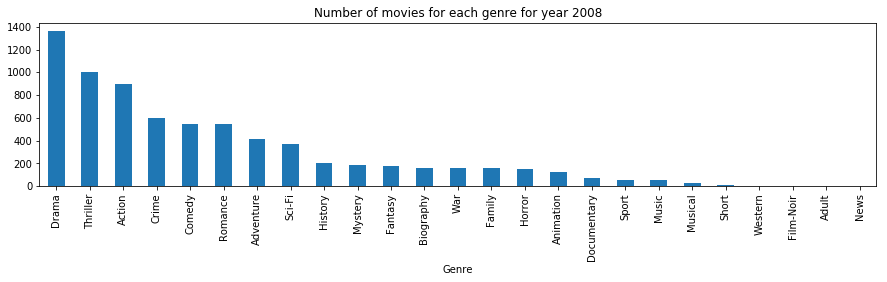

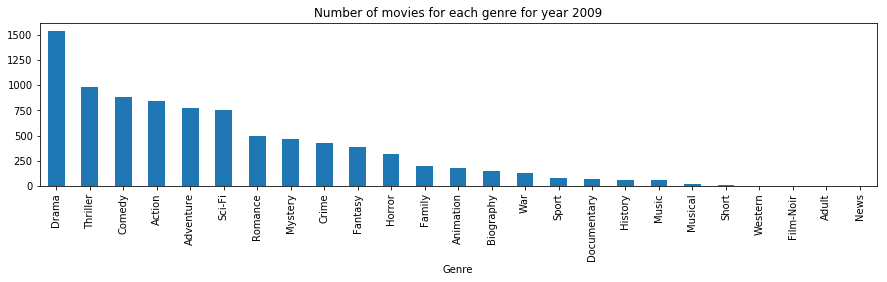

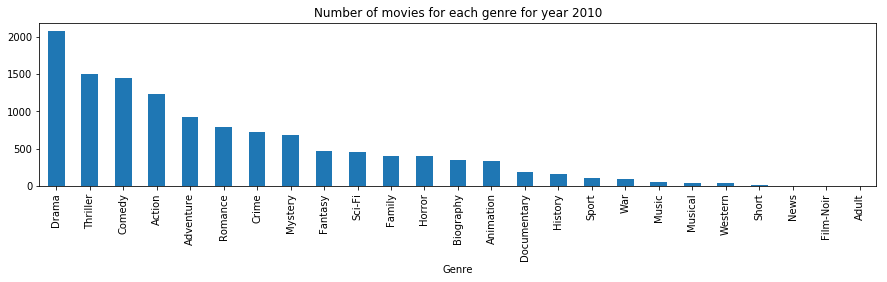

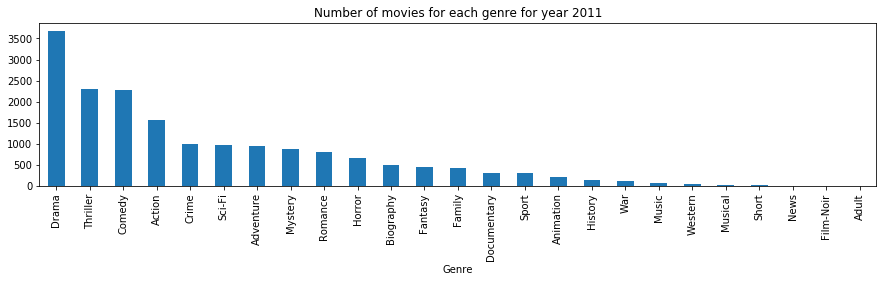

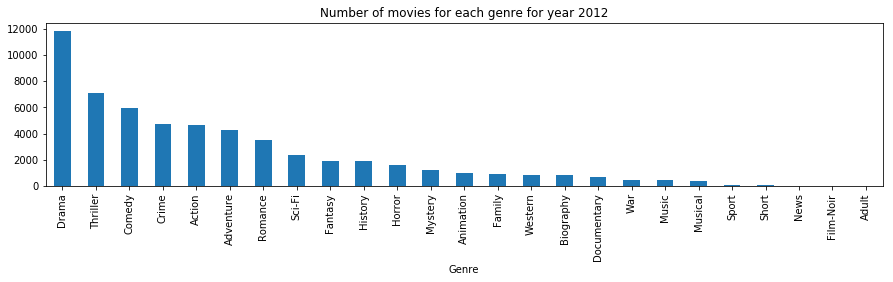

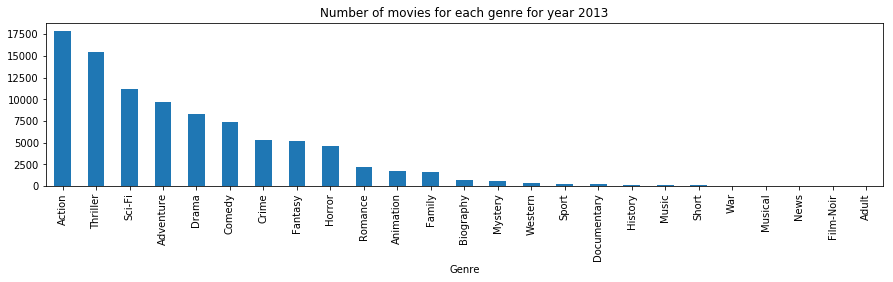

In [38]:
# Calculating total number of movies count for each genre for the past decade(2003-2013)
for year in range(2003,2014):
    df_year = movie_data[movie_data['release_year']==year]
    df_temp = pd.DataFrame(columns=['genre', 'num_movies'])
    for genre in genres_unique.genre:
        row = [genre, df_year[df_year[genre]==True][['movie_id']].count()]
        df_temp.loc[len(df_temp)] = row
    df_temp['num_movies'] = df_temp['num_movies'].astype(np.int32)
    df_temp = df_temp.sort_values('num_movies', ascending=False).set_index('genre')
    plot_fig = df_temp['num_movies'].plot(kind='bar', figsize=(15,3))
    plot_fig.set_title('Number of movies for each genre for year %s'%year)
    plot_fig.set_xlabel('Genre')
    plt.show()

We can observe that Drama is the most common genre for most of the movies followed by Thriller, Comedy, Action, Crime and this the trend is pretty much same until 2012. But number of Action and Sci-Fi movies has dramatically increased in year 2013. Also, count of horror movies has been high in year 2013, which shows users choices and interests are changing more towards Action, Thriller and Sci-Fi movies. 

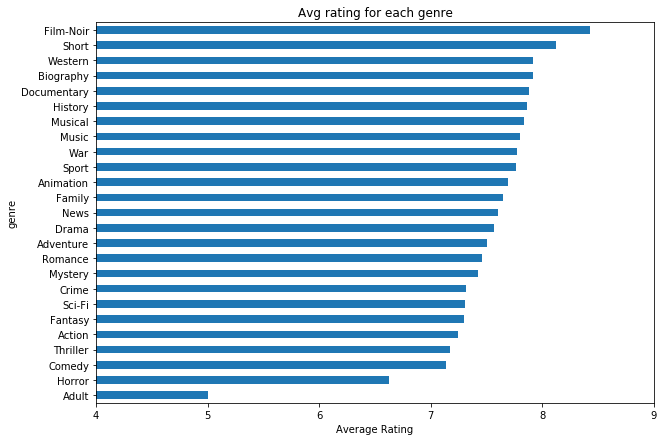

In [39]:
# Calculating average rating for each genre
df_temp = pd.DataFrame(columns=['genre', 'avg_rating'])
for genre in genres_unique.genre:
    row = [genre, round(movie_data[movie_data[genre]==True][['rating']].mean(), 2).to_string()[6:]]
    df_temp.loc[len(df_temp)] = row
df_temp['avg_rating'] = pd.to_numeric(df_temp['avg_rating'])
df_temp = df_temp.sort_values('avg_rating', ascending=True).set_index('genre')
plot_fig = df_temp['avg_rating'].plot(kind='barh', figsize=(10,7))
plot_fig.set_title('Avg rating for each genre')
plot_fig.set_xlabel('Average Rating') 
plt.xlim(4,9)
plt.show()

We can see that genre Fil-Noir is having high average rating followed by short films, Western and so on. Adult movies is having lowest avrage rating among all genres.But we can notice one thing here, Film-Noir has less number movies to be rated by users so it's average rating is more than other movie genre. This trend is same for Short, Western, Biography, Documentry.

The genres having movies rating between 7 to 7.5 have decent movies count so its average rating makes more sense and looks accurate. The middle rage of genres have more count of movies and ratings so this data isn't biased

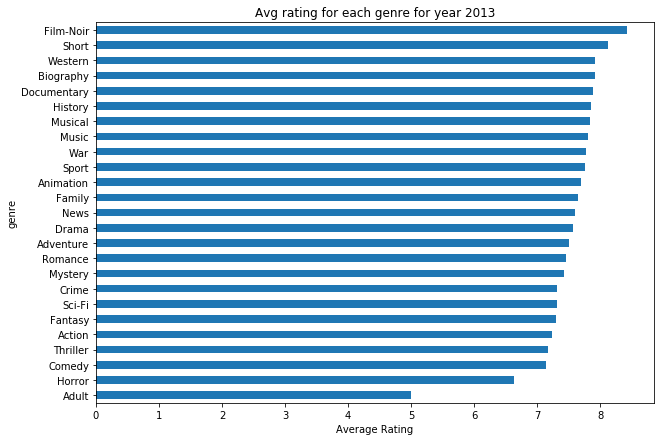

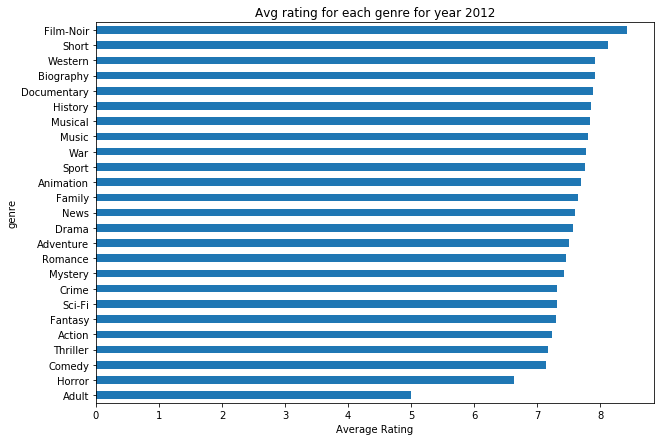

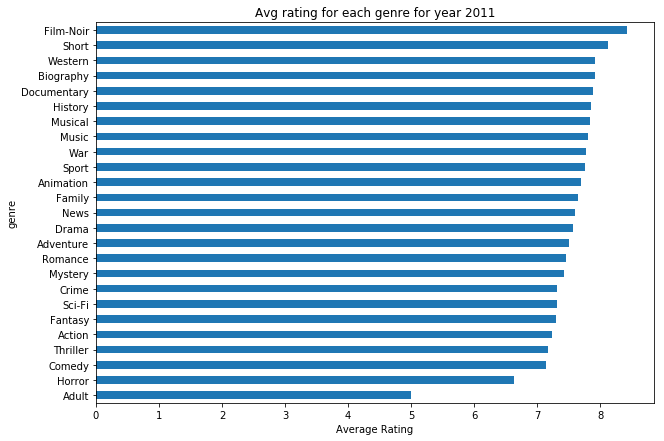

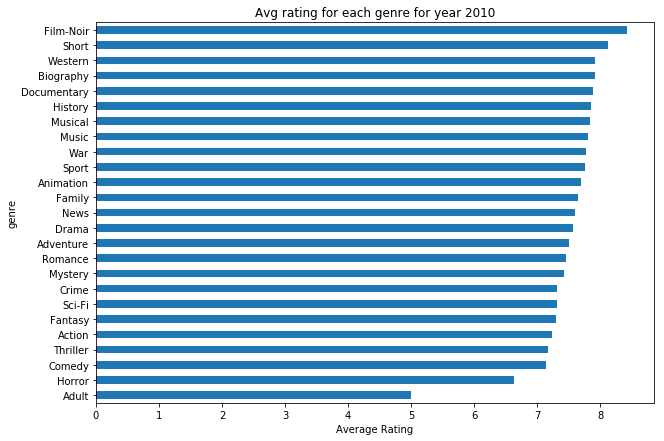

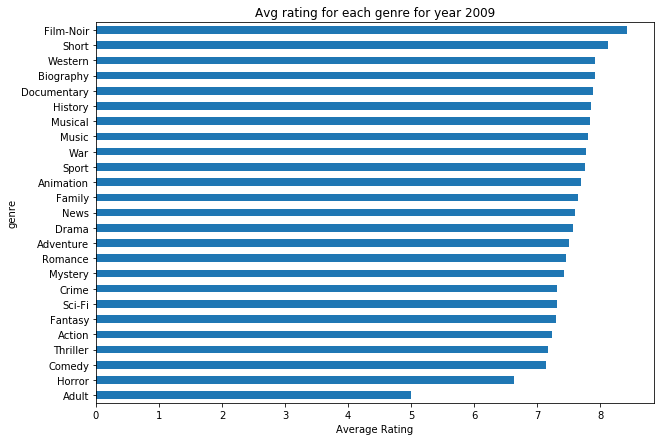

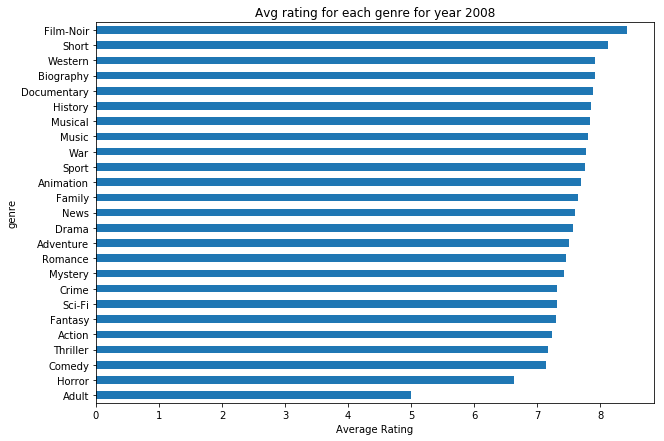

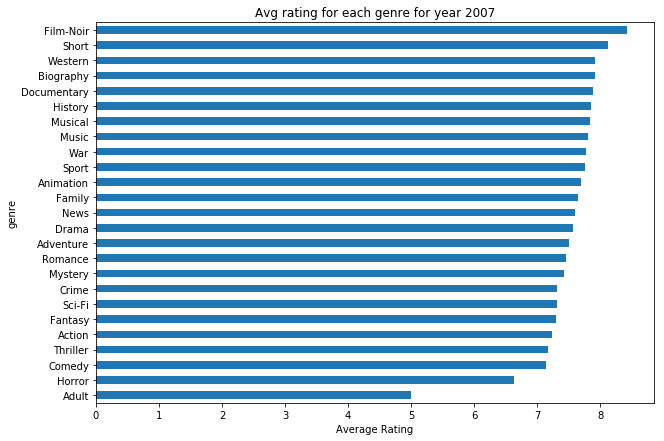

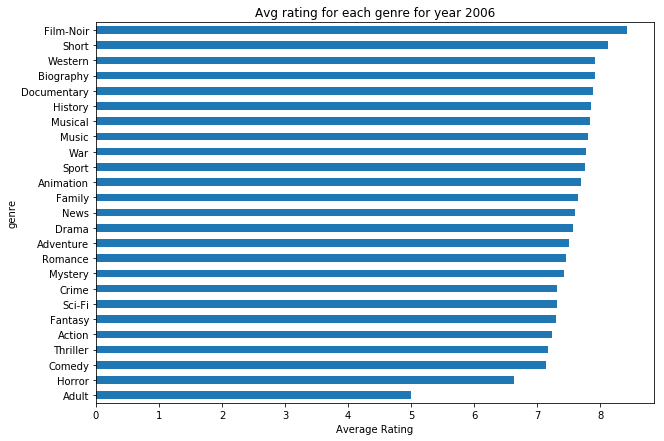

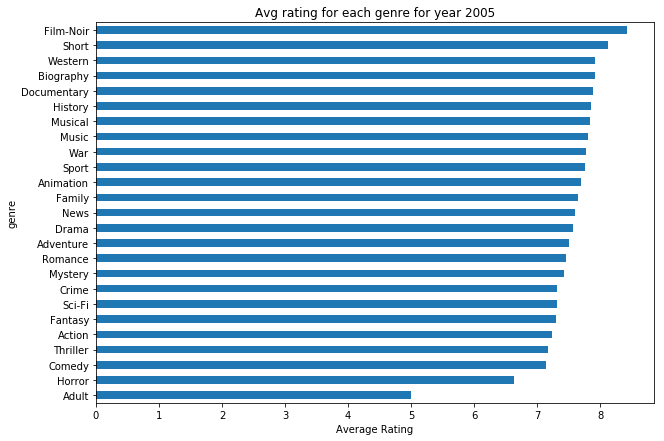

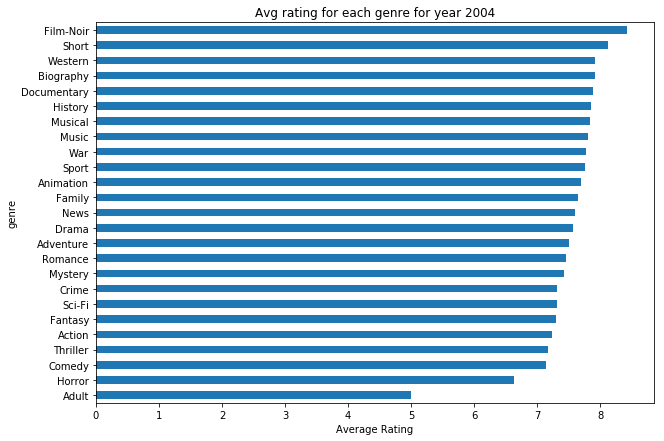

In [40]:
# Calculating average rating for each genre for the past decade(2003-2013)
for year in range(2013,2003, -1):
    df_year = movie_data[movie_data['release_year']==year]
    df_temp = pd.DataFrame(columns=['genre', 'avg_rating'])
    for genre in genres_unique.genre:
        row = [genre, round(movie_data[movie_data[genre]==True][['rating']].mean(), 2).to_string()[6:]]
        df_temp.loc[len(df_temp)] = row
    df_temp['avg_rating'] = pd.to_numeric(df_temp['avg_rating'])
    df_temp = df_temp.sort_values('avg_rating', ascending=True).set_index('genre')
    plot_fig = df_temp['avg_rating'].plot(kind='barh', figsize=(10,7))
    plot_fig.set_title('Avg rating for each genre for year %s'%year)
    plot_fig.set_xlabel('Average Rating')
    plt.show()

Trend is pretty much simillar for all the genres between last 10 years given the data which can concluded from all the graphs above.

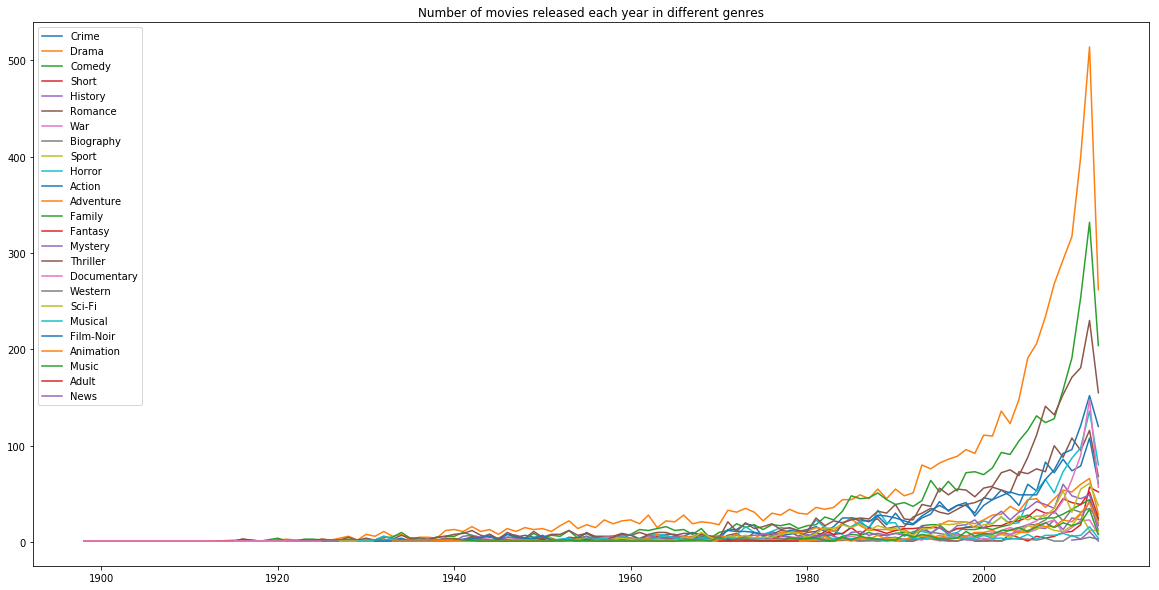

In [41]:
#
plt.figure(figsize=(20,10)) 
for genre in genres_unique.genre:
    df_temp = df_movie[df_movie[genre]==True][['release_year', 'movie_id']]
    df_temp = df_temp.groupby(['release_year']).count().reset_index().rename(columns={'release_year':'year', 'movie_id':'#movies'})
    plt.plot(df_temp['year'], df_temp['#movies'], label=genre)
plt.title('Number of movies released each year in different genres')
plt.legend()
plt.show()

We can observe from this graph that the distribution of movies with drama genre has the maximum count followed by comedy and Thriller.

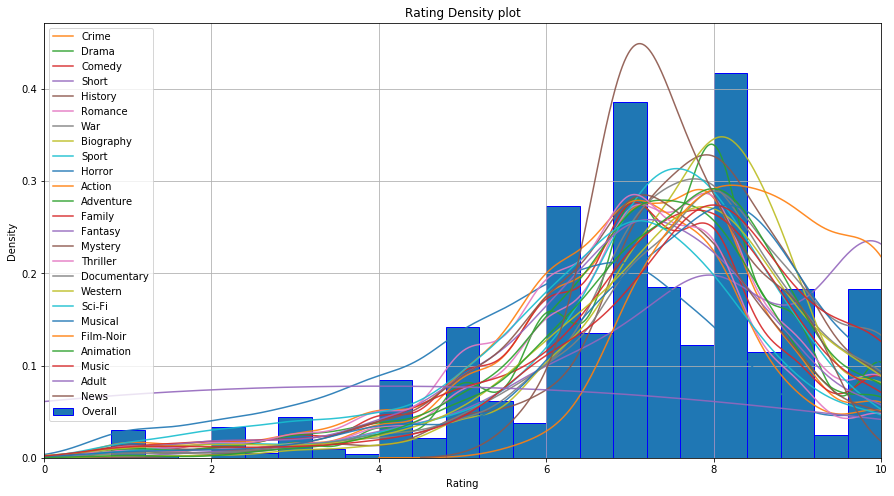

In [42]:
# observing distribution of average ratings for each genres using histogram plot 
df_temp = movie_data[['movie_id','rating']].groupby('movie_id').mean()

# Histogram of all ratings
df_temp.hist(bins=25, grid=False, edgecolor='b', normed=True, label ='Overall', figsize=(15,8))

# KDE plot per genre
for genre in genres_unique.genre:
    df_temp = movie_data[movie_data[genre]==True][['movie_id','rating']].groupby('movie_id').mean()
    df_temp.rating.plot(grid=True, alpha=0.9, kind='kde', label=genre)
plt.legend()
plt.xlim(0,10)
plt.xlabel('Rating')
plt.title('Rating Density plot')
plt.show()

We can see that all genres possess a left-skewed distribution with a mean around 7.32, except Musical genre because of low rating in the initial years. Also, Mistery genre is having high rating in the intial years so the average is greater than the distribution in the plot. It is also observed with Biography genre as number of movies is less as compared to the user ratings. Drama is consistently most common genre and has more ratings as well so it has noramal distribution over average ratings. 